- ATIKOSSIE RAYANN 
- ETUDIANT INGENIEUR 3A ESIEA
- atikossie@et.esiea.fr
- +33615620940


# 1- Indiquez les étapes que vous suivez pour vérifier les données.

- Examiner la cohérence des données : Nous allons vérifier si toutes les colonnes sont correctement remplies et s'il n'y a pas de valeurs aberrantes ou manquantes.
- Valider les formats de données : Nous allons nous assurer que les dates, les adresses et les valeurs numériques sont correctement formatées.
- Éliminer les doublons : Nous allons vérifier s'il y a des enregistrements en double dans les données.
- Gérer les valeurs manquantes : Nous allons décider comment traiter les valeurs manquantes, que ce soit en les imputant ou en les laissant telles quelles en fonction de leur impact sur l'analyse.
- Vérification de la cohérence des relations : Nous allons nous assurer que les relations entre les données (par exemple, mission et conducteur) sont cohérentes.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
data = pd.read_csv('missions_study.csv')
print(data.head())


         Date     Client Mission Reference  Prix Client  Prix Driver  \
0  2023-04-17  Company A           EUz6kKq        106.0        45.00   
1  2023-04-17  Company B           GHle2KU         30.0        23.00   
2  2023-04-17  Company C           668k6ee         22.5        15.00   
3  2023-04-17  Company C           Z8lxGlD         22.5        20.00   
4  2023-04-17  Company D           IMkgFPA        551.0       477.04   

                                   Adresse de départ  \
0            1 rue de l'ile de France 94460 Valenton   
1           120 Avenue Saint-Exupéry, Antony, France   
2                  13 Rue du Commerce, Paris, France   
3  39 Avenue Louis Breguet, 78140 Vélizy-Villacou...   
4         15 Rue d'Ebersheim, 67600 Sélestat, France   

                              Adresse d'arrivée Retard driver  \
0           2 Allée des Aulnes, Trappes, France          -187   
1          74, route de la Reine 92100 Boulogne          -122   
2     93 Avenue Emile Zola, 75015 P

In [87]:
data1 = pd.read_csv('drivers.csv')
print(data1.head())

            Driver Date d'activation  Number point Permis  Num permis  \
0  test_1@test.com        05/03/2020                   12         NaN   
1  test_2@test.com        19/03/2021                   12      1234.0   
2  test_3@test.com        04/09/2019                    7         NaN   
3  test_4@test.com        06/05/2023                    9      1234.0   
4  test_5@test.com        07/05/2023                   10         NaN   

  Uniforme ok  
0         Yes  
1         Yes  
2         Yes  
3         Yes  
4         NaN  


In [88]:
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 450 non-null    datetime64[ns]
 1   Client               450 non-null    object        
 2   Mission Reference    450 non-null    object        
 3   Prix Client          450 non-null    float64       
 4   Prix Driver          450 non-null    float64       
 5   Adresse de départ    450 non-null    object        
 6   Adresse d'arrivée    450 non-null    object        
 7   Retard driver        450 non-null    float64       
 8   Driver login         450 non-null    object        
 9   mission Status       450 non-null    object        
 10  Distance total       450 non-null    float64       
 11  Durée de la mission  450 non-null    float64       
 12  Rating Client        61 non-null     float64       
 13  Month                450 non-null  

In [89]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Driver               5 non-null      object 
 1   Date d'activation    5 non-null      object 
 2   Number point Permis  5 non-null      int64  
 3   Num permis           2 non-null      float64
 4   Uniforme ok          4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 328.0+ bytes
None


- Il est important de convertir les colonnes dans leurs bons types de données pour effectuer des analyses précises et cohérentes

In [36]:

# Validons les formats de données
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = ['Prix Client', 'Prix Driver', 'Retard driver', 'Distance total', 'Durée de la mission', 'Rating Client']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Gérons les valeurs manquantes en imputant avec des valeurs par défaut
data['Prix Client'].fillna(0, inplace=True)
data['Prix Driver'].fillna(0, inplace=True)

 


# Éliminons les doublons
data_no_duplicates = data.drop_duplicates()

# Imprimons les informations finales
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 450 non-null    datetime64[ns]
 1   Client               450 non-null    object        
 2   Mission Reference    450 non-null    object        
 3   Prix Client          450 non-null    float64       
 4   Prix Driver          450 non-null    float64       
 5   Adresse de départ    450 non-null    object        
 6   Adresse d'arrivée    450 non-null    object        
 7   Retard driver        450 non-null    float64       
 8   Driver login         450 non-null    object        
 9   mission Status       450 non-null    object        
 10  Distance total       450 non-null    float64       
 11  Durée de la mission  450 non-null    float64       
 12  Rating Client        61 non-null     float64       
dtypes: datetime64[ns](1), float64(6), o

In [37]:
missing_values = data.isnull().sum()
print(missing_values)


Date                     0
Client                   0
Mission Reference        0
Prix Client              0
Prix Driver              0
Adresse de départ        0
Adresse d'arrivée        0
Retard driver            0
Driver login             0
mission Status           0
Distance total           0
Durée de la mission      0
Rating Client          389
dtype: int64


In [90]:
missing_values1 = data1.isnull().sum()
print(missing_values1)

Driver                 0
Date d'activation      0
Number point Permis    0
Num permis             3
Uniforme ok            1
dtype: int64


In [92]:
data1['Uniforme ok'] = 'yes'
data1['Uniforme ok']

0    yes
1    yes
2    yes
3    yes
4    yes
Name: Uniforme ok, dtype: object

In [94]:
data1['Num permis'] = '1234.0'
data1['Num permis']

0    1234.0
1    1234.0
2    1234.0
3    1234.0
4    1234.0
Name: Num permis, dtype: object

In [38]:
# Remplacons les valeurs manquantes dans 'Retard driver' par 0
data['Retard driver'].fillna(0, inplace=True)

# Remplacons les valeurs manquantes dans 'Distance total' par la moyenne
average_distance = data['Distance total'].mean()
data['Distance total'].fillna(average_distance, inplace=True)

# Remplacons les valeurs manquantes dans 'Durée de la mission' par la moyenne
average_duration = data['Durée de la mission'].mean()
data['Durée de la mission'].fillna(average_duration, inplace=True)

# Imprimons les informations finales sur les valeurs manquantes
print(data.isnull().sum())


Date                     0
Client                   0
Mission Reference        0
Prix Client              0
Prix Driver              0
Adresse de départ        0
Adresse d'arrivée        0
Retard driver            0
Driver login             0
mission Status           0
Distance total           0
Durée de la mission      0
Rating Client          389
dtype: int64


- Maintenant nous navons plus de valeurs maquentes

In [39]:
summary_stats = data.describe()
print(summary_stats)


       Prix Client  Prix Driver  Retard driver  Distance total  \
count   450.000000   450.000000     450.000000      450.000000   
mean    132.905533    99.632244    1240.373333      162.404878   
std     155.790711   128.901739   11495.266074      238.961677   
min       0.000000     0.000000    -794.000000        0.000000   
25%      30.000000    21.000000    -178.750000       18.000000   
50%      58.000000    32.500000    -127.000000       47.000000   
75%     175.000000   137.000000     -42.000000      165.101220   
max     913.680000   598.000000  100000.000000      996.000000   

       Durée de la mission  Rating Client  
count           450.000000      61.000000  
mean            123.136038       3.213115  
std             144.630881       1.761768  
min              12.000000       0.000000  
25%              41.000000       2.000000  
50%              67.000000       3.000000  
75%             125.500000       5.000000  
max             978.000000       5.000000  


In [95]:
summary_stats1 = data1.describe()
print(summary_stats1)

       Number point Permis
count              5.00000
mean              10.00000
std                2.12132
min                7.00000
25%                9.00000
50%               10.00000
75%               12.00000
max               12.00000


In [40]:
# Vérifions si chaque mission a un conducteur associé
missions_without_driver = data[data['Driver login'].isnull()]
if len(missions_without_driver) == 0:
    print("Toutes les missions ont un conducteur associé.")
else:
    print("Il y a des missions sans conducteur associé :\n")
    print(missions_without_driver)

# Vérifions si chaque conducteur a des missions associées
drivers_without_missions = data[data['Driver login'].notnull()]['Driver login'].unique()
missing_drivers_missions = data[~data['Driver login'].isin(drivers_without_missions)]
if len(missing_drivers_missions) == 0:
    print("Tous les conducteurs ont des missions associées.")
else:
    print("Il y a des conducteurs sans mission associée :\n")
    print(missing_drivers_missions)


Toutes les missions ont un conducteur associé.
Tous les conducteurs ont des missions associées.


- COPIER LES DATAFRAME DANS UN NOUVEAUX FICHIER CSV

In [97]:
data.to_csv('missions_study_Clean.csv', index=False) 
data1.to_csv('drivers_Clean.csv', index=False)

# 2 - Déterminons des mesures pour mesurer la productivité des conducteurs et l’efficacité de la mission


Pour mesurer la productivité des conducteurs et l'efficacité des missions, nous pouvons utiliser différentes mesures et indicateurs clés de performance (KPI) en fonction de nos objectifs et de la nature de notre entreprise. Voici quelques mesures que nous pourrions considérer :

Productivité des conducteurs :

Nombre de missions terminées : Nous pouvons compter le nombre total de missions que chaque conducteur a réussi à terminer dans une période donnée.

Distance parcourue par mission : Nous pouvons calculer la distance moyenne parcourue par mission pour chaque conducteur.

Durée moyenne des missions : Nous pouvons calculer la durée moyenne que chaque conducteur passe sur chaque mission.

Revenu généré par conducteur : Nous pouvons additionner les revenus générés par chaque conducteur en fonction des prix des clients et des conducteurs.

Efficacité des missions :

Moyenne du retard des conducteurs : Nous pouvons calculer la moyenne des retards des conducteurs par rapport à l'heure prévue de livraison.

Taux de réussite des missions : Nous pouvons calculer le pourcentage de missions terminées avec succès par rapport au nombre total de missions.

Temps de traitement moyen des missions : Nous pouvons calculer le temps moyen entre le début et la fin de chaque mission.

Taux de satisfaction client : Nous pouvons utiliser les évaluations des clients pour mesurer leur satisfaction globale.

Efficacité de la planification : Nous pouvons évaluer la capacité à respecter les calendriers et à minimiser les retards.

Ratio de prix client / prix conducteur : Nous pouvons comparer les prix facturés aux clients par rapport aux paiements effectués aux conducteurs pour évaluer l'efficacité de la tarification.

Indicateurs visuels :

Pour visualiser ces mesures, nous pourrions utiliser des graphiques tels que des graphiques à barres, des graphiques en secteurs, des graphiques linéaires ou des tableaux de bord interactifs. 


In [66]:
# Calculons les mesures de productivité des conducteurs
driver_productivity = data.groupby('Driver login').agg({
    'Mission Reference': 'count',
    'Distance total': 'mean',
    'Durée de la mission': 'mean',
    'Prix Driver': 'sum'
}).reset_index()

# Calculons les mesures d'efficacité des missions
mission_efficiency = data.groupby('mission Status').agg({
    'Retard driver': 'mean',
    'Mission Reference': 'count',
    'Durée de la mission': 'mean',
    'Rating Client': 'mean'
}).reset_index()

# 3 - Fournissons quelques KPI et visualisations

## KPI : Nombre de missions terminées

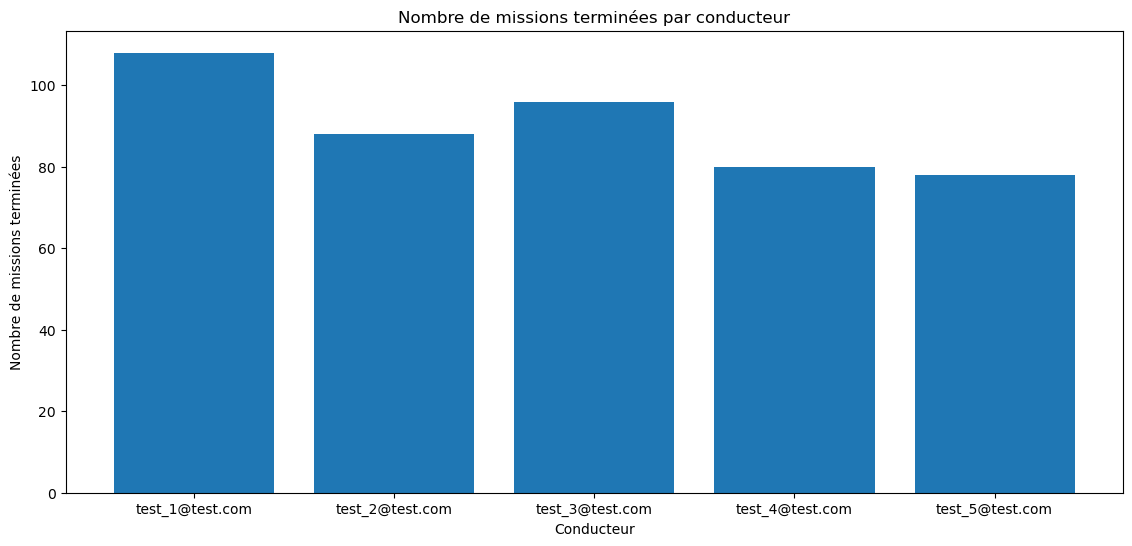

In [67]:
 
# Visualisation
plt.figure(figsize=(30, 6))

# Graphique à barres : Nombre de missions terminées par conducteur
plt.subplot(1, 2, 1)
plt.bar(driver_productivity['Driver login'], driver_productivity['Mission Reference'])
plt.xlabel('Conducteur')
plt.ylabel('Nombre de missions terminées')
plt.title('Nombre de missions terminées par conducteur')

 
plt.show()


## KPI : Nombre de distances par conducteur

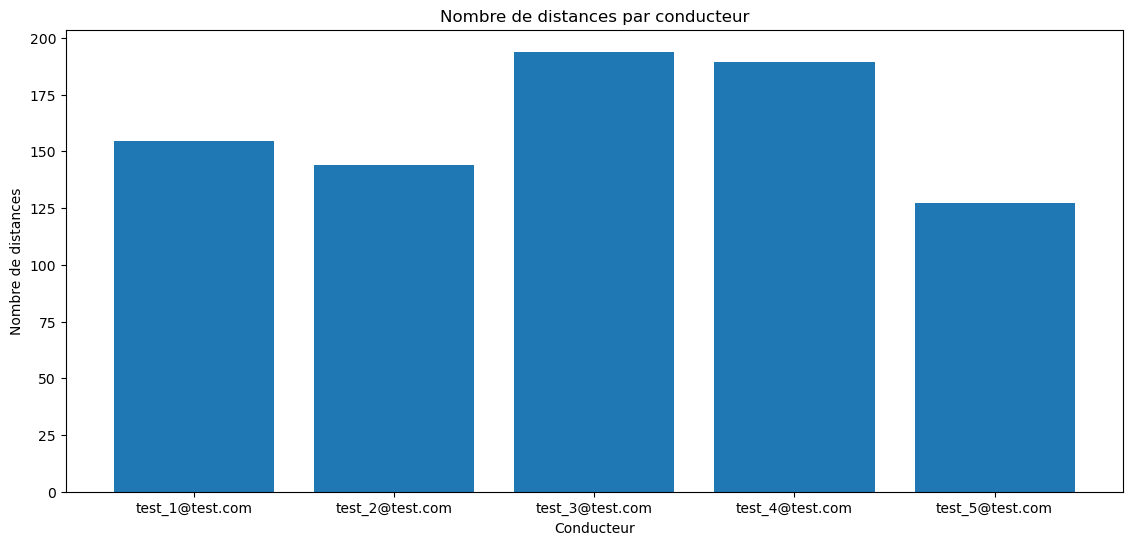

In [68]:
 
# Visualisation
plt.figure(figsize=(30, 6))

# Graphique à barres : Nombre de distances par conducteur
plt.subplot(1, 2, 1)
plt.bar(driver_productivity['Driver login'], driver_productivity['Distance total'])
plt.xlabel('Conducteur')
plt.ylabel('Nombre de distances')
plt.title('Nombre de distances par conducteur')

 
plt.show()


## KPI : Durée de la mission par conducteur

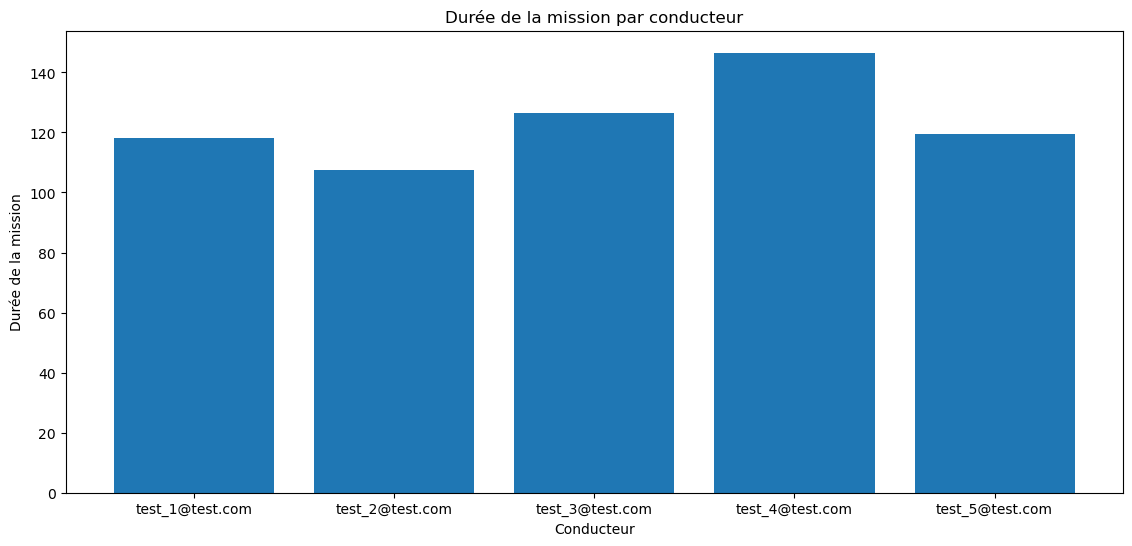

In [69]:
 
# Visualisation
plt.figure(figsize=(30, 6))

# Graphique à barres : Durée de la mission par conducteur
plt.subplot(1, 2, 1)
plt.bar(driver_productivity['Driver login'], driver_productivity['Durée de la mission'])
plt.xlabel('Conducteur')
plt.ylabel('Durée de la mission')
plt.title('Durée de la mission par conducteur')

 
plt.show()


## KPI : Prix Driver de la mission par conducteur

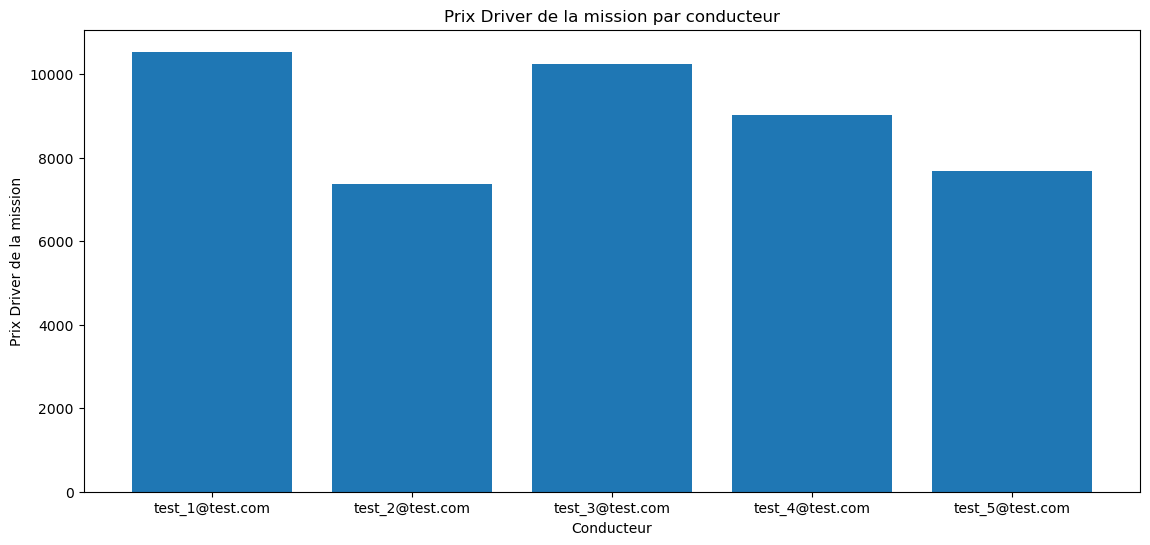

In [70]:
 
# Visualisation
plt.figure(figsize=(30, 6))

# Graphique à barres : Prix Driver de la mission par conducteur
plt.subplot(1, 2, 1)
plt.bar(driver_productivity['Driver login'], driver_productivity['Prix Driver'])
plt.xlabel('Conducteur')
plt.ylabel('Prix Driver de la mission')
plt.title('Prix Driver de la mission par conducteur')

 
plt.show()


## KPI : Durée de la mission de la mission par status 

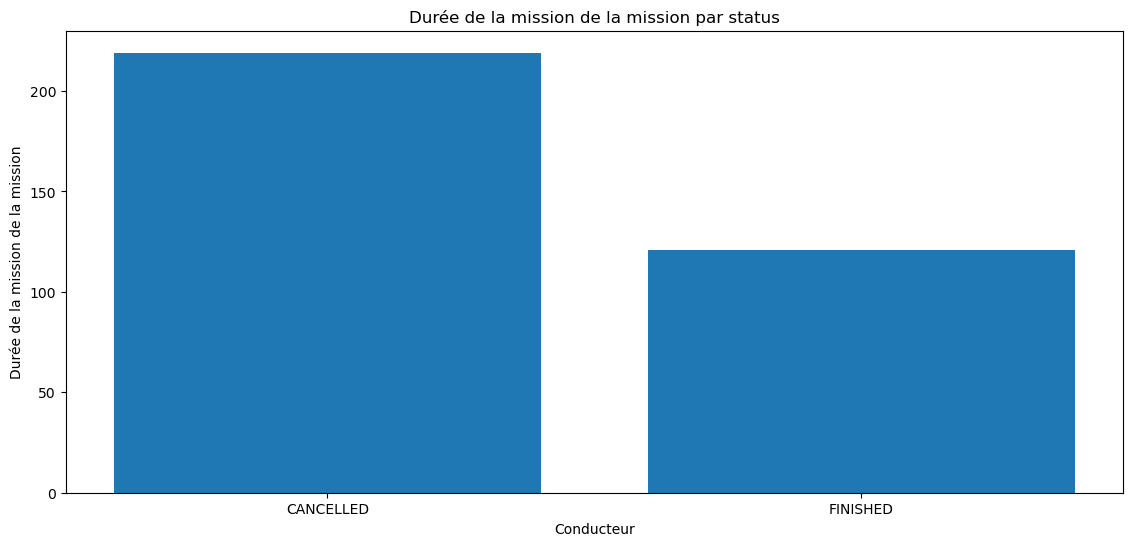

In [78]:
 
# Visualisation
plt.figure(figsize=(30, 6))

# Graphique à barres : Durée de la mission par status
plt.subplot(1, 2, 1)
plt.bar(mission_efficiency['mission Status'], mission_efficiency['Durée de la mission'])
plt.xlabel('Conducteur')
plt.ylabel('Durée de la mission de la mission')
plt.title('Durée de la mission de la mission par status')

 
plt.show()


## KPI : Mission Reference de la mission par status 

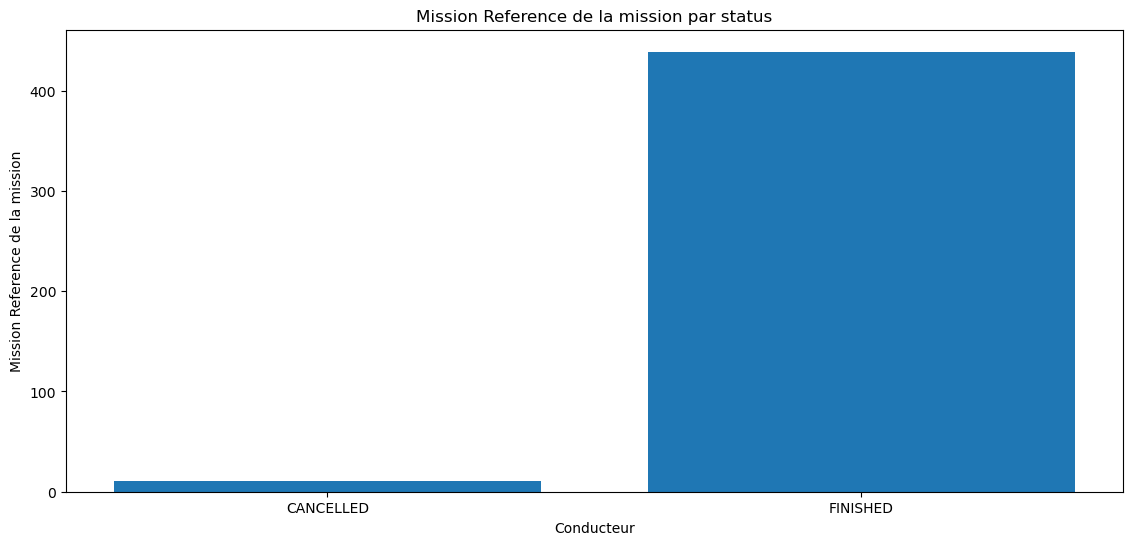

In [79]:
 
# Visualisation
plt.figure(figsize=(30, 6))

# Graphique à barres : Mission Reference de la mission par status
plt.subplot(1, 2, 1)
plt.bar(mission_efficiency['mission Status'], mission_efficiency['Mission Reference'])
plt.xlabel('Conducteur')
plt.ylabel('Mission Reference de la mission')
plt.title('Mission Reference de la mission par status')

 
plt.show()


## KPI : Retard driver de la mission par status

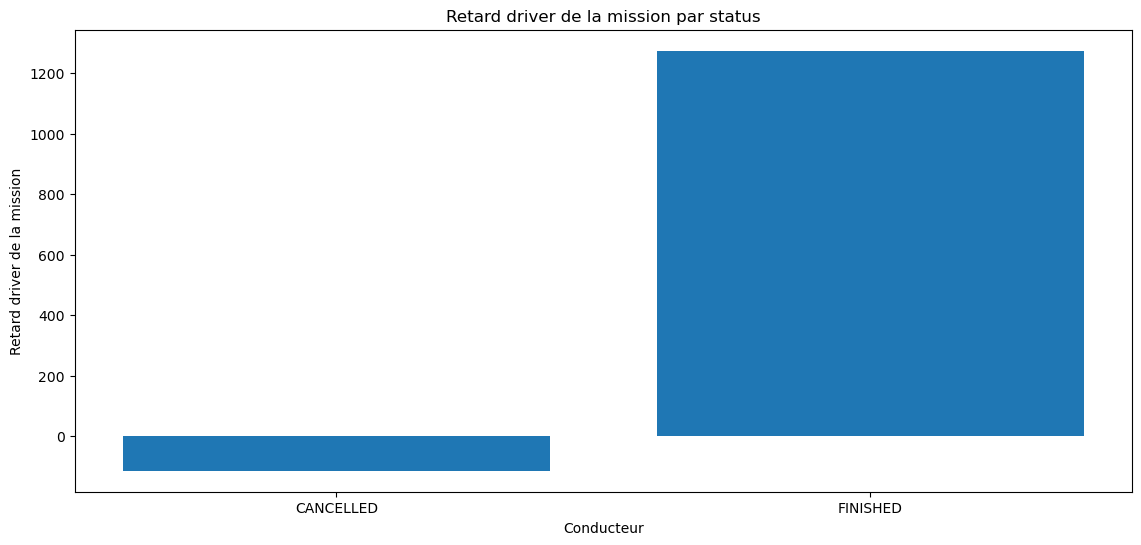

In [76]:
 
# Visualisation
plt.figure(figsize=(30, 6))

# Graphique à barres : Retard driver de la mission par status
plt.subplot(1, 2, 1)
plt.bar(mission_efficiency['mission Status'], mission_efficiency['Retard driver'])
plt.xlabel('Conducteur')
plt.ylabel('Retard driver de la mission')
plt.title('Retard driver de la mission par status')

 
plt.show()


## KPI : Rating Client par status

Text(0.5, 1.0, 'Rating Client par status')

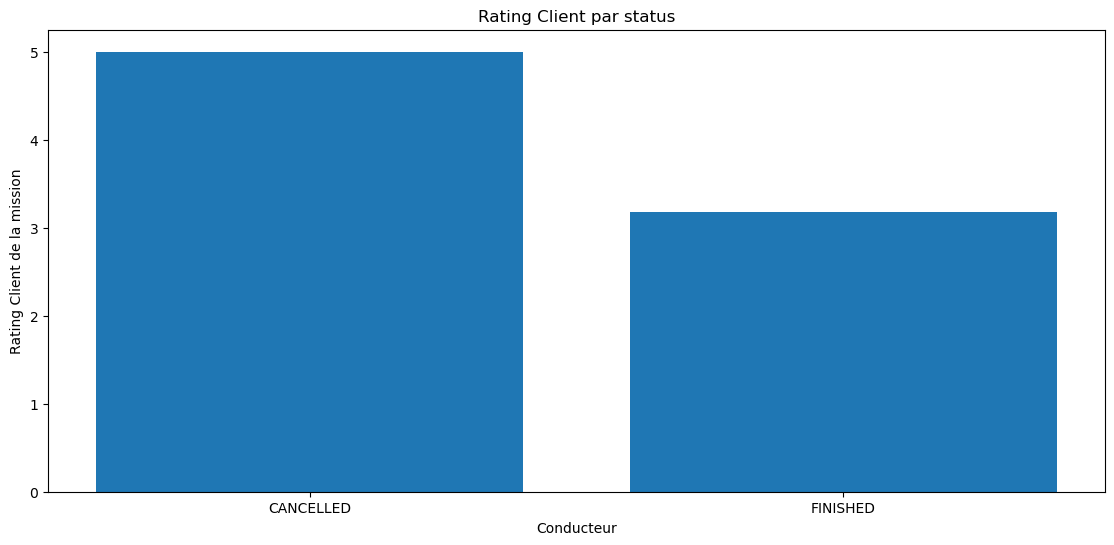

In [75]:
# Visualisation
plt.figure(figsize=(30, 6))

# Graphique à barres : Rating Client de la mission par status
plt.subplot(1, 2, 1)
plt.bar(mission_efficiency['mission Status'], mission_efficiency['Rating Client'])
plt.xlabel('Conducteur')
plt.ylabel('Rating Client de la mission')
plt.title('Rating Client par status')

## KPI : Moyenne du retard des conducteurs par date

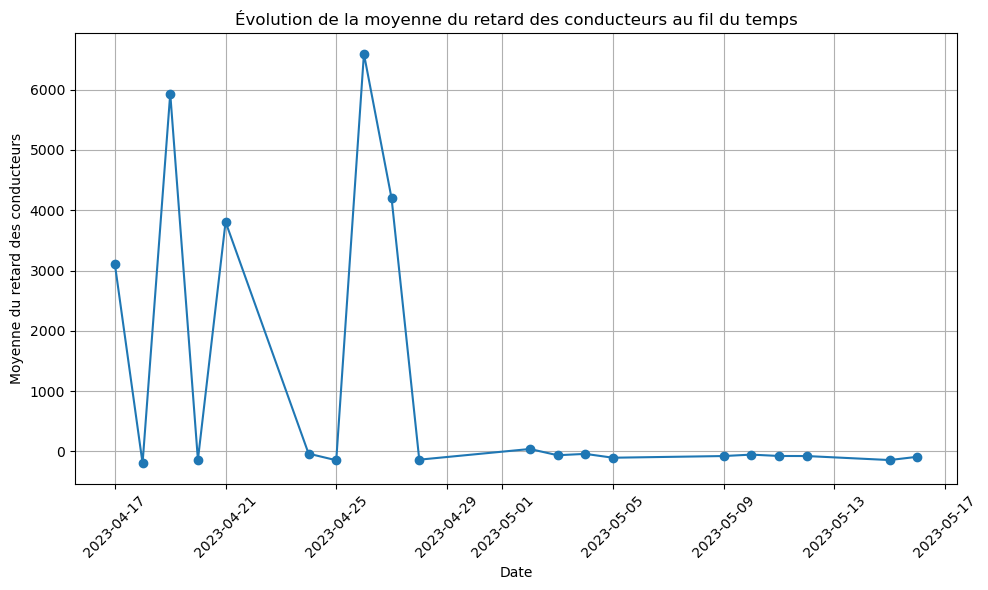

In [58]:

# Calculons la moyenne du retard des conducteurs par date
avg_delay_by_date = data.groupby('Date')['Retard driver'].mean()

# Créons le graphique linéaire
plt.figure(figsize=(10, 6))
plt.plot(avg_delay_by_date.index, avg_delay_by_date.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Moyenne du retard des conducteurs')
plt.title("Évolution de la moyenne du retard des conducteurs au fil du temps")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

## KPI : Moyenne du retard des conducteurs par mois

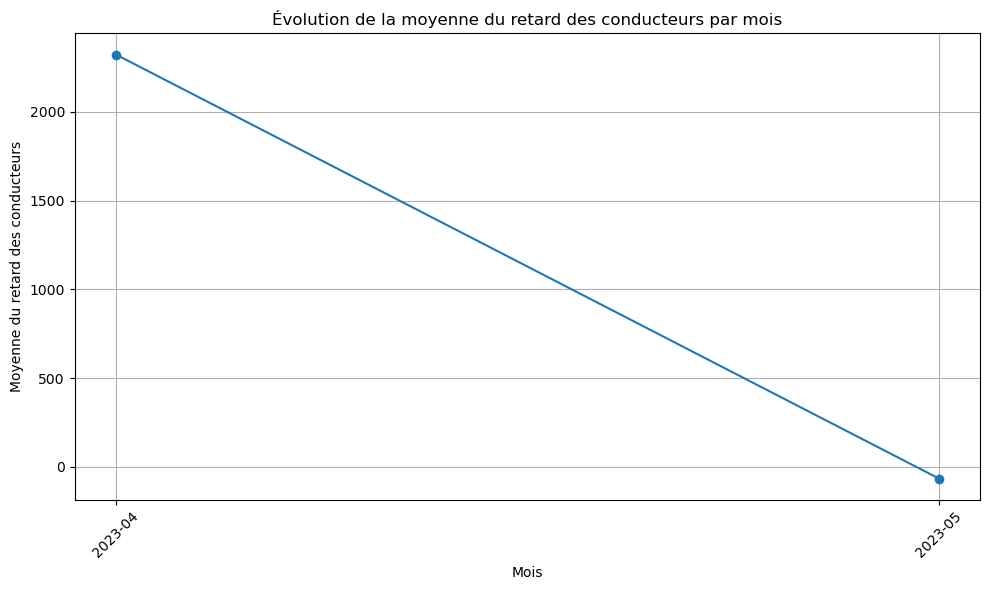

In [53]:
# Calculons la moyenne du retard des conducteurs par mois
data['Month'] = data['Date'].dt.to_period('M')
avg_delay_per_month = data.groupby('Month')['Retard driver'].mean()

# Convertissons les périodes en chaînes de caractères
avg_delay_per_month.index = avg_delay_per_month.index.astype(str)

# Créons le graphique linéaire
plt.figure(figsize=(10, 6))
plt.plot(avg_delay_per_month.index, avg_delay_per_month.values, marker='o')
plt.xlabel('Mois')
plt.ylabel('Moyenne du retard des conducteurs')
plt.title("Évolution de la moyenne du retard des conducteurs par mois")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## KPI : Taux de réussite des missions

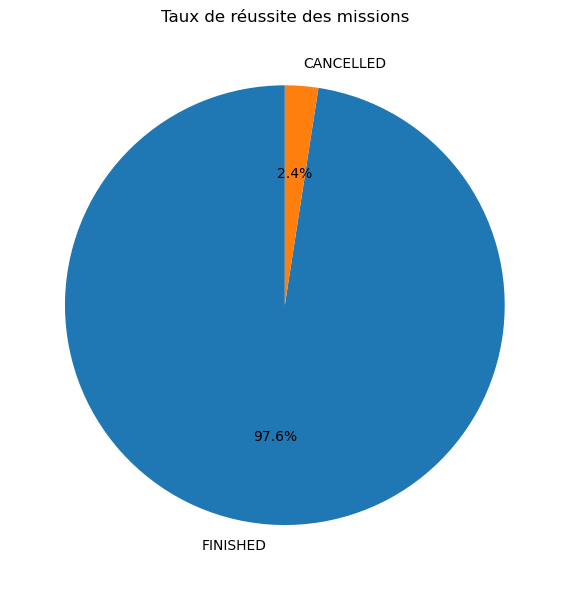

In [51]:
# Calculons le taux de réussite des missions
success_rate = data['mission Status'].value_counts(normalize=True) * 100

# Créons le graphique en secteurs
plt.figure(figsize=(6, 6))
plt.pie(success_rate, labels=success_rate.index, autopct='%1.1f%%', startangle=90)
plt.title('Taux de réussite des missions')
plt.tight_layout()
plt.show()


# 4 - Proposons des suggestions, le cas échéant

In [86]:
# Calculons la matrice de corrélations entre les colonnes numériques
correlation_matrix = data.corr()

# Affichons la matrice de corrélations
print(correlation_matrix)

                     Prix Client  Prix Driver  Retard driver  Distance total  \
Prix Client             1.000000     0.955104      -0.012310        0.555668   
Prix Driver             0.955104     1.000000      -0.010597        0.525311   
Retard driver          -0.012310    -0.010597       1.000000       -0.052706   
Distance total          0.555668     0.525311      -0.052706        1.000000   
Durée de la mission     0.576701     0.560579      -0.044023        0.553895   
Rating Client           0.019318     0.055457      -0.069595        0.200711   

                     Durée de la mission  Rating Client  
Prix Client                     0.576701       0.019318  
Prix Driver                     0.560579       0.055457  
Retard driver                  -0.044023      -0.069595  
Distance total                  0.553895       0.200711  
Durée de la mission             1.000000      -0.015384  
Rating Client                  -0.015384       1.000000  


Voici quelques suggestions pour améliorer la productivité et l'efficacité des chauffeurs en se basant sur ces données :

- Optimisation des itinéraires : La distance totale semble avoir une corrélation positive avec le prix client. Cela suggère qu'optimiser les itinéraires pour réduire la distance parcourue pourrait aider à augmenter la rentabilité en minimisant les coûts liés au carburant et au temps de conduite.

- Réduction des retards : La corrélation négative entre le retard du conducteur et le prix client suggère que réduire les retards des conducteurs peut contribuer à maintenir la satisfaction des clients. Des systèmes de gestion du temps et des rappels pourraient être mis en place pour aider les conducteurs à respecter les horaires.

- Formation et évaluation des chauffeurs : La durée de la mission semble avoir une corrélation positive avec le prix client. Cela pourrait signifier que des missions plus longues sont généralement mieux rémunérées. Assurez-vous que les chauffeurs sont bien formés et évalués pour effectuer efficacement de longues missions sans compromettre la qualité du service.

- Récompenses basées sur les performances : Nous pourrions envisager d'instaurer un système de récompenses basé sur les performances, où les chauffeurs qui maintiennent de bonnes évaluations de la part des clients et qui respectent les horaires pourraient être récompensés d'une manière ou d'une autre. Cela pourrait encourager une meilleure performance globale.

- Collecte de commentaires clients détaillés : Bien que le "Rating Client" n'ait pas une corrélation forte avec d'autres variables, il est toujours important d'obtenir des commentaires détaillés des clients sur les expériences de conduite. Cela pourrait aider à identifier des domaines spécifiques où des améliorations pourraient être apportées.

- Utilisation de la technologie : Des solutions de suivi en temps réel et de gestion de flotte pourraient être mises en place pour surveiller l'emplacement des chauffeurs, optimiser les itinéraires en temps réel, et aider à minimiser les retards et les inefficacités.

- Formation continue : Organiser des sessions de formation régulières pour les chauffeurs afin de les aider à améliorer leurs compétences en conduite, en gestion du temps et en service à la clientèle.

- Communication et rétroaction : Établir une communication ouverte avec les chauffeurs pour recueillir leurs commentaires sur les défis qu'ils rencontrent et pour partager les meilleures pratiques. 